# Problem 1: Measuring Dark Matter

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.integrate import quad
from astropy import constants as const
from astropy.cosmology import Planck18
from astropy import units as u

In [3]:
plt.rc('font', family='serif', size = 16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 4
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1

## (a) 
The file **data/galaxy_v.csv** on contains velocities measured for stars in the direction of Draco, given in km s $^{-1}$. Extract the velocity dispersion  from that file. What possible error could occur here? Try to deal with it.

In [4]:
data = pd.read_csv("data/galaxy_v.csv", index_col=0)

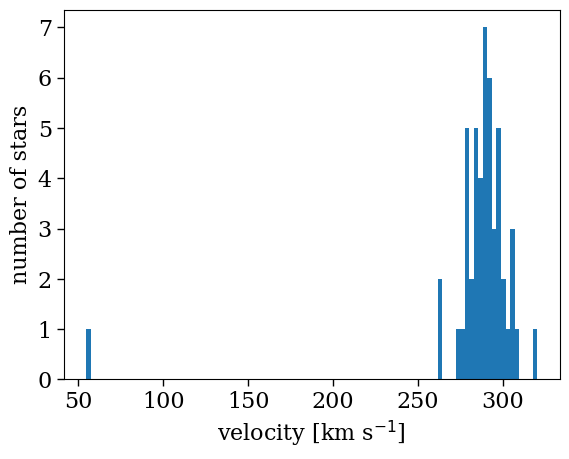

In [6]:
plt.hist(data.velocity, bins=100)
plt.xlabel("velocity [km s$^{-1}$]")
plt.ylabel("number of stars")
plt.show()

It looks like there is an outlier. Maybe it's a star that does not actually belong to the Draco galaxy. Let's exclude it from the analysis.

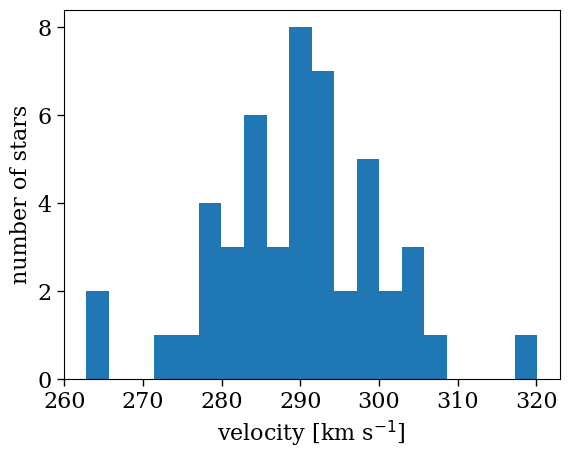

In [7]:
outlier_mask = data.velocity < 100
cleaned_velocities = data.velocity[~outlier_mask]

plt.hist(cleaned_velocities, bins=20)
plt.xlabel("velocity [km s$^{-1}$]")
plt.ylabel("number of stars")
plt.show()

The dispersion of this distribution is given by the standard deviation

In [8]:
disp = np.std(cleaned_velocities) * u.km / u.s
print(f"The velocity dispersion is {disp:.2f}")

The velocity dispersion is 10.62 km / s


# (b) 
Calculate the mass of the Draco galaxy from the dispersion calculated in a). What is Draco's mass-to-light ratio?

The virial theorem states that

$$ \frac{GM}{R} \approx \sigma^2$$

The mass contained in a sphere with radius $R$ is then

$$ M = \frac{R \sigma^2}{G} $$

In [7]:
rh = 120 * u.pc
vmass = rh * disp ** 2 / const.G
print(
    f"The virial half-mass of Draco is {vmass.to('kg'):.2e} \n"
    f"That is {vmass.to('Msun'):.2e}"
)

The virial half-mass of Draco is 6.25e+36 kg 
That is 3.14e+06 solMass


Our sun is a fairly common star. Assuming all stars have the mass of our sun the mass-to-light ratio $MTL$ is given by 

$ MTL = \frac{M }{L}$ with units of $ \frac{M_{\odot}}{L_\odot} $

In [8]:
draco_lum = 1.8e5 * u.Lsun * 1/2
mtl = vmass.to('Msun')/draco_lum
mtl_frac =  vmass.to('Msun')/draco_lum * const.L_sun/ const.M_sun
print(f"Draco's mass-to-light ratio (in units of Msol/Lsol) is {mtl:.2f}")

Draco's mass-to-light ratio (in units of Msol/Lsol) is 34.94 solMass / solLum
